# Section 1: The physics of zombie outbreaks

References:

1. Munz et al. "When zombies attack!: Mathematical modelling of an outbreak of zombie infection" Infectious Disease Modelling Research (2009) http://loe.org/images/content/091023/Zombie%20Publication.pdf
2. Alemi et al. "You Can Run, You Can Hide: The Epidemiology and Statistical Mechanics of Zombies" Phys. Rev. E 92, 052801 (2015) https://arxiv.org/abs/1503.01104
3. Langtangen et al. "Escaping the Zombie Threat by Mathematics", http://folk.uio.no/kent-and/zombies.pdf
4. Witkowski et al. "Bayesian Analysis of Epidemics - Zombies, Influenza, and other Diseases" https://www.researchgate.net/publication/258849793_Bayesian_Analysis_of_Epidemics_-_Zombies_Influenza_and_other_Diseases

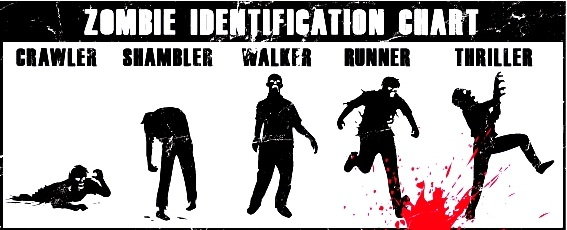

From Munz et al.:

Three classes:
* Susceptible (S)
* Zombie (Z)
* Removed (R)

Three differential equations:

* $dS/dt = P - \beta S Z - \delta S$
    * The change in the number of susceptibles with time is based on:
        * (+) the birth rate P
        * (-) the transmission factor $\beta$ times the number of suceptibles times the number of zombies 
        * (-) the natural death rate $\delta$  times the number of suscpetibles
      
      
* $dZ/dt = \beta S Z + gR - \alpha S Z$
    * The change in the number of zombies with time is based on:
        * (+) the transmission factor $\beta$ times the number of suceptibles times the number of zombies 
        * (+) The resurection rate $g$ times the number of removed 
        * (-) The zombie kill rate $\alpha$ times the number of susceptible times the number of zombies
        
        
* $dR/dt = \delta S + \alpha S Z - g R$        
    * The change in the number of removed with time is based on:
        * (+) The natural death rate $\delta$  times the number of suscpetibles
        * (+) The zombie kill rate $\alpha$ times the number of susceptible times the number of zombies
        * (-) The resurection rate $g$ times the number of removed 

In [27]:
# Zombie apocalypse modeling
# 
# See: Munz et al., published in Infectious Disease Modelling Research 
#
# Code based on: http://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html


import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.ion()
plt.rcParams['figure.figsize'] = 10, 8

P = 0       # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A = 0.0001  # destroy percent  (per day)

# solve the system dy/dt = f(y, t)
def f(y, t):
     Si = y[0]
     Zi = y[1]
     Ri = y[2]
     # the model equations (see Munz et al. 2009)
     f0 = P - B*Si*Zi - d*Si        # birth rate - transmission rate *  - natural death percent
     f1 = B*Si*Zi + G*Ri - A*Si*Zi 
     f2 = d*Si + A*Si*Zi - G*Ri
     return [f0, f1, f2]

# initial conditions
S0 = 500.              # initial population
Z0 = 1                 # initial zombie population
R0 = 0                 # initial death population
y0 = [S0, Z0, R0]     # initial condition vector
t  = np.linspace(0, 5., 1000)         # time grid



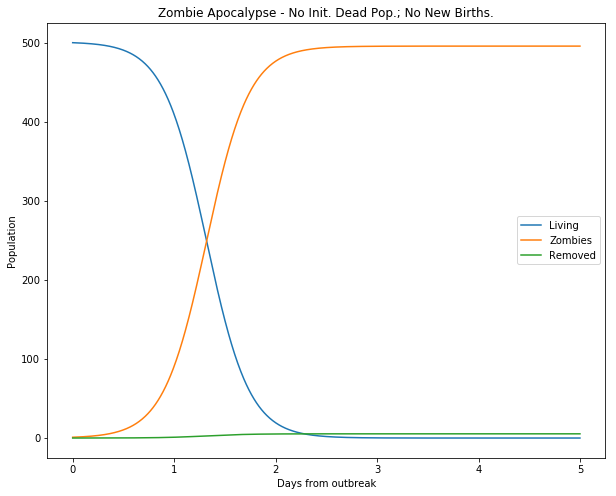

In [19]:

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.plot(t, R, label='Removed')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)


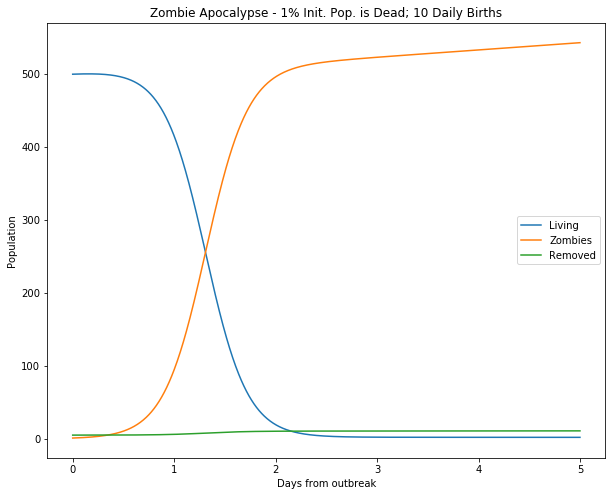

In [20]:

# change the initial conditions
R0 = 0.01*S0   # 1% of initial pop is dead
P  = 10        # 10 new births daily
y0 = [S0, Z0, R0]

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.plot(t, R, label='Removed')

plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; 10 Daily Births')
plt.legend(loc=0)


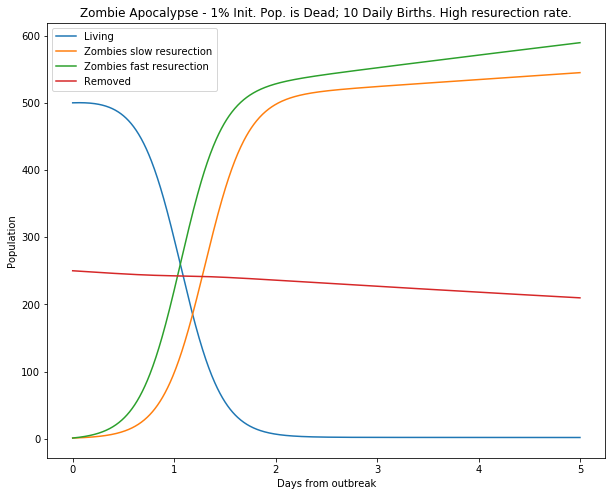

In [23]:


# change the initial conditions
R0 = 0.5*S0   # 50% of initial pop is dead
G = 0.04    # resurection rate is high
P  = 10        # 10 new births daily
y0 = [S0, Z0, R0]

# solve the DEs
soln = odeint(f, y0, t)
S3 = soln[:, 0]
Z3 = soln[:, 1]
R3 = soln[:, 2]

plt.figure()
plt.plot(t, S3, label='Living')
plt.plot(t, Z, label='Zombies slow resurection')
plt.plot(t, Z3, label='Zombies fast resurection')
plt.plot(t, R3, label='Removed')

plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; 10 Daily Births. High resurection rate.')
plt.legend(loc=0)



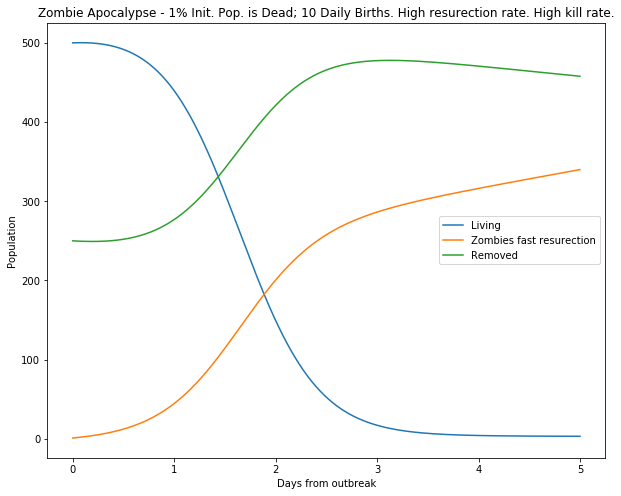

In [25]:
# change the initial conditions
R0 = 0.5*S0   # 50% of initial pop is dead
G = 0.04    # resurection rate is high
P  = 10        # 10 new births daily
A = 0.005  # destroy percent  (per day)

y0 = [S0, Z0, R0]

# solve the DEs
soln = odeint(f, y0, t)
S4 = soln[:, 0]
Z4 = soln[:, 1]
R4 = soln[:, 2]

plt.figure()
plt.plot(t, S4, label='Living')
#plt.plot(t, Z, label='Zombies  resurection')
plt.plot(t, Z4, label='Zombies fast resurection')
plt.plot(t, R4, label='Removed')

plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; 10 Daily Births. High resurection rate. High kill rate.')
plt.legend(loc=0)


Add a 4th differential equation:

* dA/dt = constant
    * Zombie kill rate increases with time (we learn)

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.ion()
plt.rcParams['figure.figsize'] = 10, 8

P = 10      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A_initial  = 0.001 # initial destroy percent  (per day)
A_increase = 0.005 # destroy percent increases with time  (per day)

# solve the system dy/dt = f(y, t)
def fg(y, t):
     Si = y[0]
     Zi = y[1]
     Ri = y[2]
     A  = y[3]
     # the model equations (see Munz et al. 2009)
     f0 = P - B*Si*Zi - d*Si        # birth rate - transmission rate *  - natural death percent
     f1 = B*Si*Zi + G*Ri - A*Si*Zi 
     f2 = d*Si + A*Si*Zi - G*Ri
     f3 = A_increase
     return [f0, f1, f2, f3]

# initial conditions
S0 = 500.              # initial population
Z0 = 1                 # initial zombie population
R0 = 0                 # initial death population
y0 = [S0, Z0, R0, A_initial ]     # initial condition vector
t  = np.linspace(0, 5., 1000)         # time grid


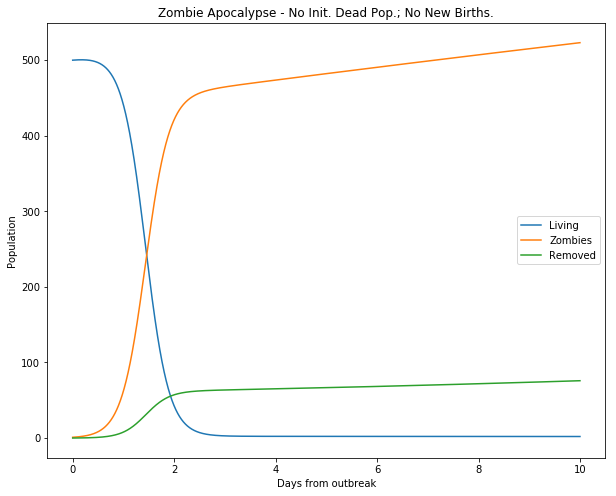

In [73]:

P = 10      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A_initial  = 0.000 # initial destroy percent  (per day)
A_increase = 0.0001 # destroy percent increases with time  (per day)
t  = np.linspace(0, 10., 4000)         # time grid


# solve the DEs
soln = odeint(fg, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.plot(t, R, label='Removed')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)


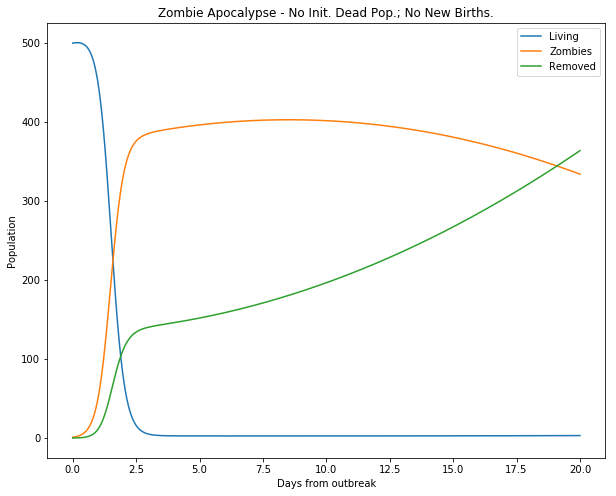

In [74]:


P = 10      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A_initial  = 0.000 # initial destroy percent  (per day)
A_increase = 0.001 # destroy percent increases with time  (per day)
t  = np.linspace(0, 20., 4000)         # time grid


# solve the DEs
soln = odeint(fg, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.plot(t, R, label='Removed')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)



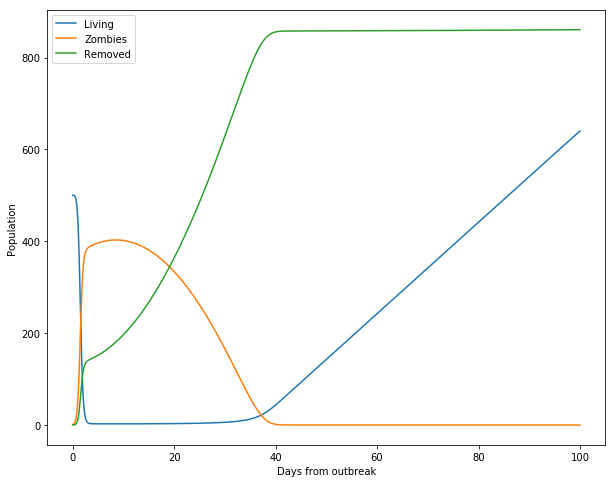

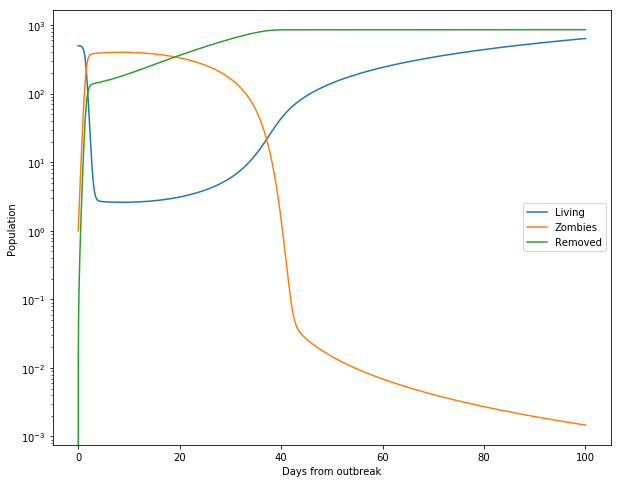

In [75]:

P = 10      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A_initial  = 0.000 # initial destroy percent  (per day)
A_increase = 0.001 # destroy percent increases with time  (per day)
t  = np.linspace(0, 100., 10000)         # time grid


# solve the DEs
soln = odeint(fg, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.plot(t, R, label='Removed')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
#plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.plot(t, R, label='Removed')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
#plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.yscale('log')
plt.legend(loc=0)

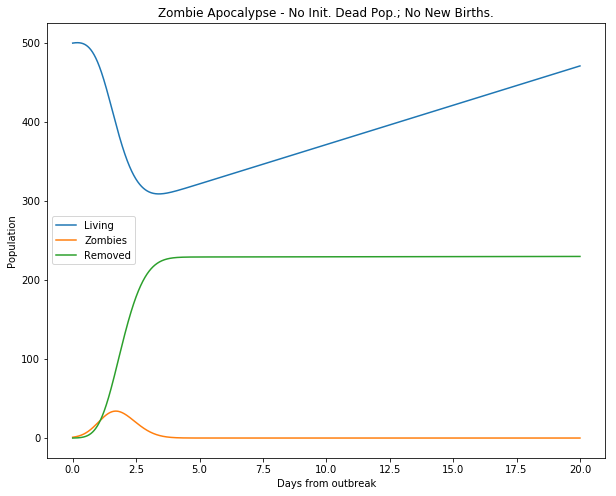

In [66]:


P = 10      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A_initial  = 0.001 # initial destroy percent  (per day)
A_increase = 0.005 # destroy percent increases with time  (per day)
t  = np.linspace(0, 20., 4000)         # time grid


# solve the DEs
soln = odeint(fg, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.plot(t, R, label='Removed')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)



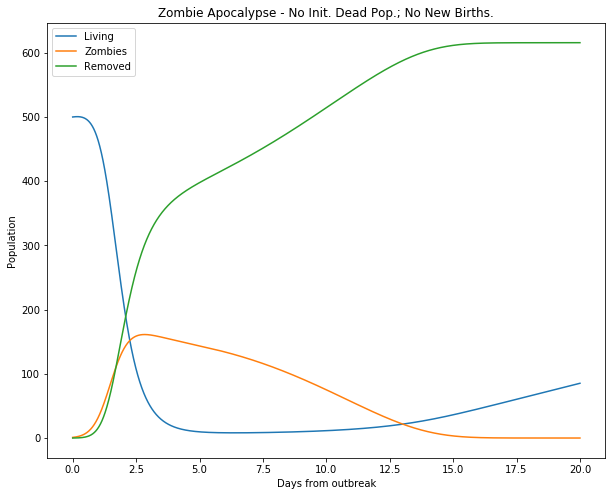

In [67]:


P = 10      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A_initial  = 0.001 # initial destroy percent  (per day)
A_increase = 0.003 # destroy percent increases with time  (per day)
t  = np.linspace(0, 20., 4000)         # time grid


# solve the DEs
soln = odeint(fg, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.plot(t, R, label='Removed')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)

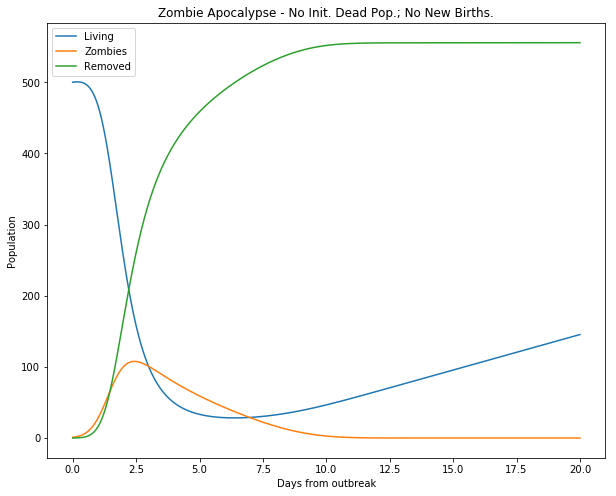

In [68]:


P = 10      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A_initial  = 0.000  # initial destroy percent  (per day)
A_increase = 0.0035 # destroy percent increases with time  (per day)
t  = np.linspace(0, 20., 4000)         # time grid


# solve the DEs
soln = odeint(fg, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.plot(t, R, label='Removed')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)



Change the model. There should not be any new births if there are no more living.

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.ion()
plt.rcParams['figure.figsize'] = 10, 8

P = 0.0001  # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A_initial  = 0.001 # initial destroy percent  (per day)
A_increase = 0.005 # destroy percent increases with time  (per day)

# solve the system dy/dt = f(y, t)
def fg(y, t):
     Si = y[0]
     Zi = y[1]
     Ri = y[2]
     A  = y[3]
     # the model equations (see Munz et al. 2009)
     f0 = Si* P - B*Si*Zi - d*Si        # birth rate - transmission rate *  - natural death percent
     f1 = B*Si*Zi + G*Ri - A*Si*Zi 
     f2 = d*Si + A*Si*Zi - G*Ri
     f3 = A_increase
     return [f0, f1, f2, f3]

# initial conditions
S0 = 500.              # initial population
Z0 = 1                 # initial zombie population
R0 = 0                 # initial death population
y0 = [S0, Z0, R0, A_initial ]     # initial condition vector
t  = np.linspace(0, 5., 1000)         # time grid


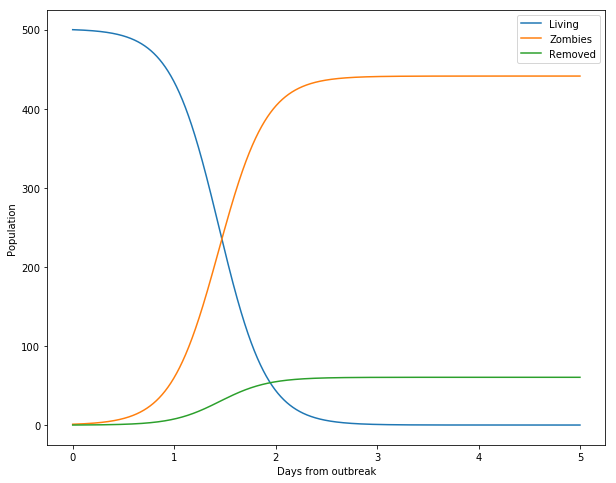

In [97]:

P = 0.001      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A_initial  = 0.000 # initial destroy percent  (per day)
A_increase = 0.0001 # destroy percent increases with time  (per day)
t  = np.linspace(0, 5., 4000)         # time grid


# solve the DEs
soln = odeint(fg, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]
A = soln[:, 3]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.plot(t, R, label='Removed')

plt.xlabel('Days from outbreak')
plt.ylabel('Population')
#plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)


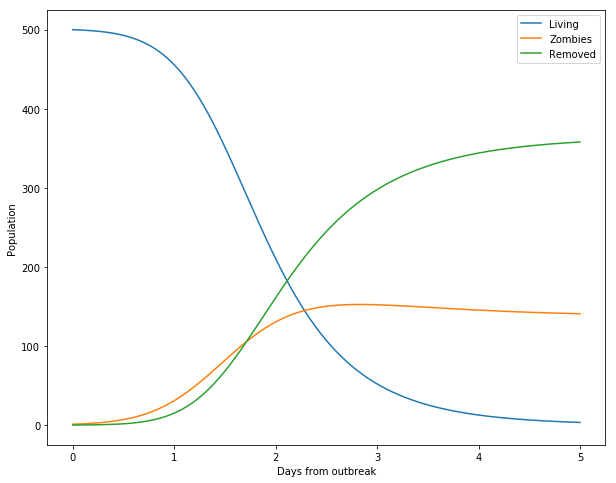

In [102]:
P = 0.001      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A_initial  = 0.000 # initial destroy percent  (per day)
A_increase = 0.003 # destroy percent increases with time  (per day)
t  = np.linspace(0, 5., 4000)         # time grid


# solve the DEs
soln = odeint(fg, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.plot(t, R, label='Removed')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
#plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)


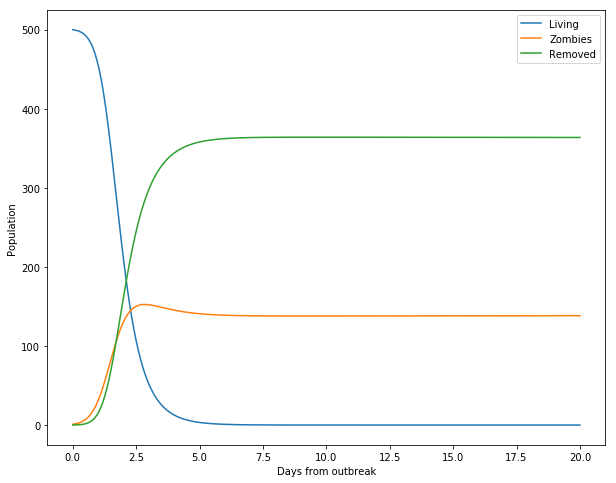

In [103]:
P = 0.001      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A_initial  = 0.000 # initial destroy percent  (per day)
A_increase = 0.003 # destroy percent increases with time  (per day)
t  = np.linspace(0, 20, 4000)         # time grid


# solve the DEs
soln = odeint(fg, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.plot(t, R, label='Removed')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
#plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)

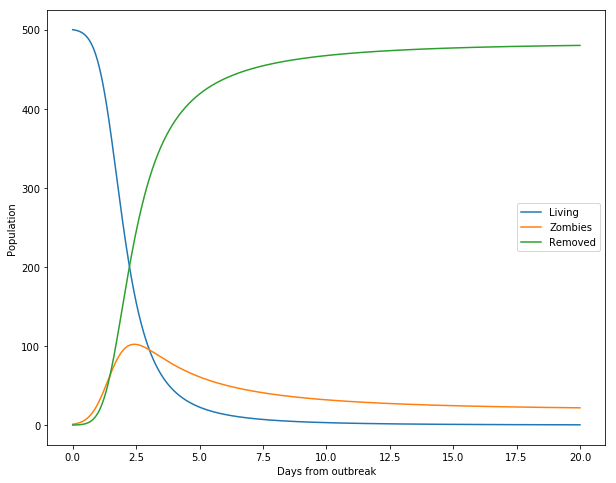

In [105]:
P = 0.001      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A_initial  = 0.000 # initial destroy percent  (per day)
A_increase = 0.0035 # destroy percent increases with time  (per day)
t  = np.linspace(0, 20, 4000)         # time grid


# solve the DEs
soln = odeint(fg, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.plot(t, R, label='Removed')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
#plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)

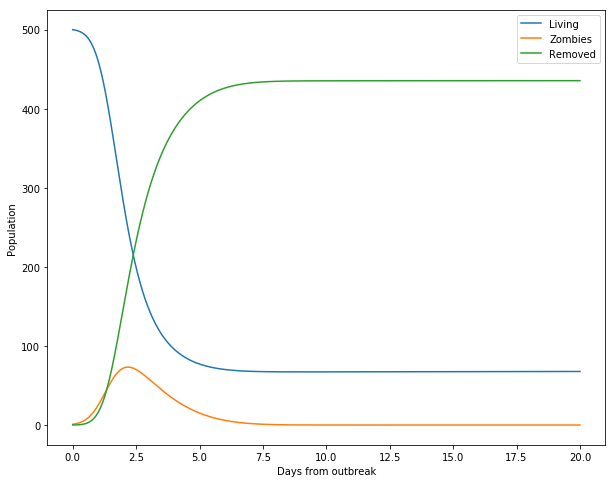

In [106]:
P = 0.001      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A_initial  = 0.000 # initial destroy percent  (per day)
A_increase = 0.0039 # destroy percent increases with time  (per day)
t  = np.linspace(0, 20, 4000)         # time grid


# solve the DEs
soln = odeint(fg, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.plot(t, R, label='Removed')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
#plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)

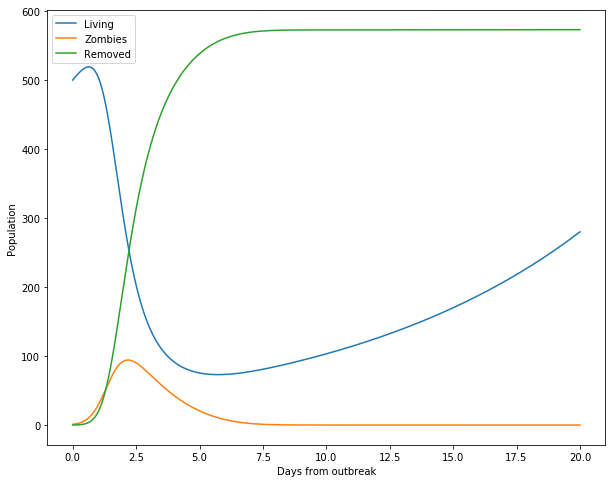

In [112]:
P = 0.1      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A_initial  = 0.000 # initial destroy percent  (per day)
A_increase = 0.0039 # destroy percent increases with time  (per day)
t  = np.linspace(0, 20, 4000)         # time grid


# solve the DEs
soln = odeint(fg, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.plot(t, R, label='Removed')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
#plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)

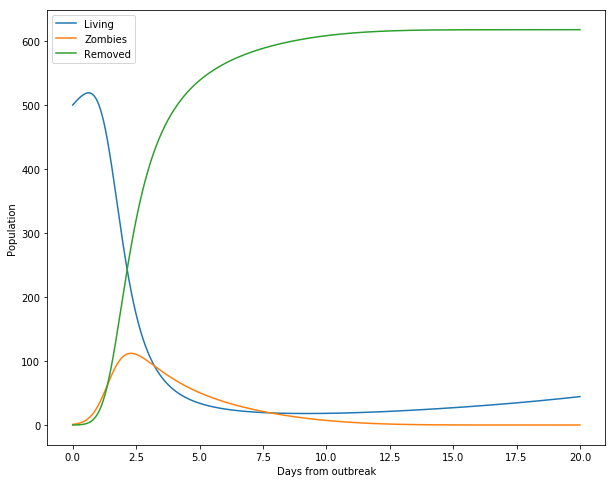

In [114]:
P = 0.1      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A_initial  = 0.000 # initial destroy percent  (per day)
A_increase = 0.0037 # destroy percent increases with time  (per day)
t  = np.linspace(0, 20, 4000)         # time grid


# solve the DEs
soln = odeint(fg, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.plot(t, R, label='Removed')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
#plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)

http://mattbierbaum.github.io/zombies-usa/

# Section 2: Cows vs Aliens

"predator-prey equations" ("Lotka-Volterra")



Prey follow the equation:

$du/dt = au - buv$

Predator follow the equation:

$dv/dt = -cv + duv$


with the following notations:

    u: number of preys (for example, cattle)

    v: number of predators (for example, aliens)

    a, b, c, d are constant parameters defining the behavior of the population:

        a is the natural growing rate of cattle, when there's no aliens

        b is the natural dying rate of cattle, due to predation

        c is the natural dying rate of aliens, when there's no cattle

        d is the factor describing how many caught cattle help create a new alien


Prey have an unlimited food supply and reproduce exponentially (this comes from $du/dt = au$)

Prey die at a rate proportional to the rate at which they meet pretators ($du/dt = - buv$)


Predators reproduce exponentially if food is available. The rate is proportional to the ammount of food ($dv/dt = duv$)

Predators die without food ($dv/dt = -cv$)



In [149]:
# Cows vs Aliens. Predator prey
# Code based on:
# http://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html

from numpy import *
import pylab as p
from scipy import integrate

# Definition of parameters
a = 1.   #  a growing rate of cattle, when there's no aliens
b = 0.1  #  b dying rate of cattle, due to predation
c = 1.5  #  c dying rate of aliens, when there's no cattle
d = 0.75 #  d factor describing how many caught cattle let create a new alien
  
def dX_dt(X, t=0):
    """ Return the growth rate of alien and cattle populations. """
    return array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*b*X[0]*X[1] ])

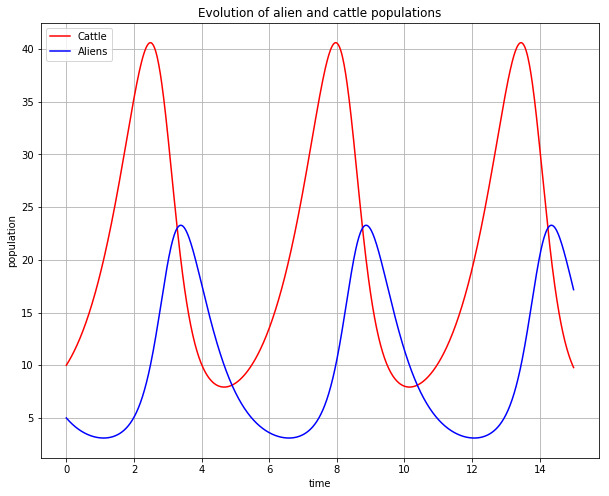

In [150]:
t = linspace(0, 15,  1000)              # time
X0 = array([10, 5])                     # initials conditions: 10 cattle and 5 aliens
X = integrate.odeint(dX_dt, X0, t) 

cattle = X[:, 0]
aliens = X[:, 1]

f1 = p.figure()
p.plot(t, cattle, 'r-', label='Cattle')
p.plot(t, aliens  , 'b-', label='Aliens')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of alien and cattle populations')
p.show()

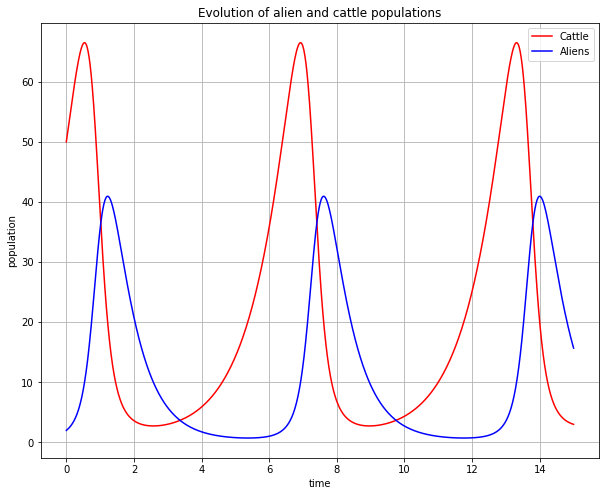

In [151]:
t = linspace(0, 15,  1000)              # time
X0 = array([50, 2])                     # initials conditions: 10 cattle and 5 aliens
X = integrate.odeint(dX_dt, X0, t) 

cattle = X[:, 0]
aliens = X[:, 1]

f1 = p.figure()
p.plot(t, cattle, 'r-', label='Cattle')
p.plot(t, aliens  , 'b-', label='Aliens')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of alien and cattle populations')
p.show()

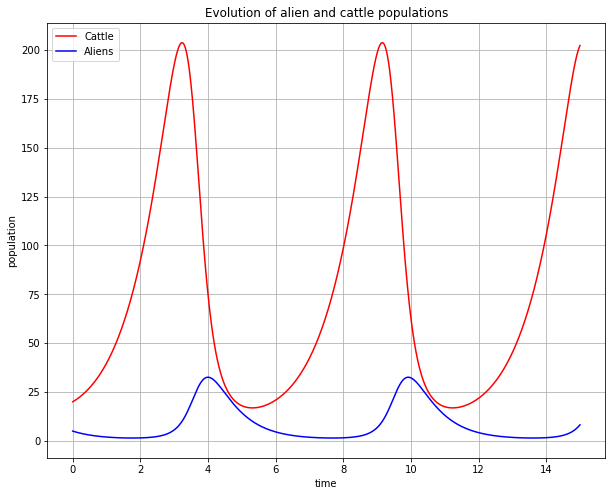

In [152]:
a = 1.   #  a growing rate of cattle, when there's no aliens
b = 0.1  #  b dying rate of cattle, due to predation
c = 1.5  #  c dying rate of aliens, when there's no cattle
d = 0.2    #  d factor describing how many caught cattle let create a new alien
  

t = linspace(0, 15,  1000)              # time
X0 = array([20, 5])                     # initials conditions: 10 cattle and 5 aliens
X = integrate.odeint(dX_dt, X0, t) 

cattle = X[:, 0]
aliens = X[:, 1]

f1 = p.figure()
p.plot(t, cattle, 'r-', label='Cattle')
p.plot(t, aliens  , 'b-', label='Aliens')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of alien and cattle populations')
p.show()

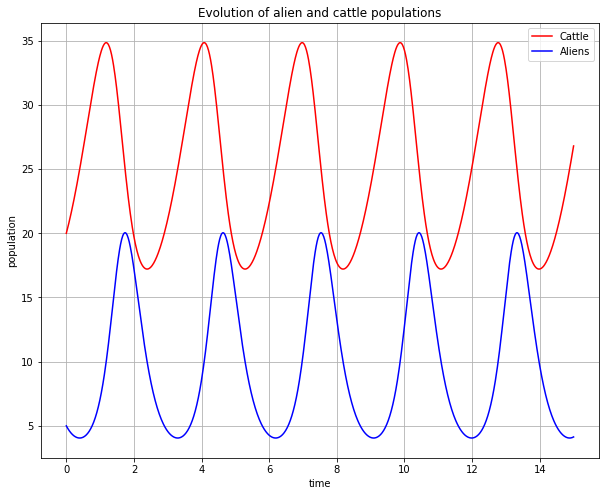

In [155]:
a = 1.   #  a growing rate of cattle, when there's no aliens
b = 0.1  #  b dying rate of cattle, due to predation
c = 5  #  c dying rate of aliens, when there's no cattle
d = 2    #  d factor describing how many caught cattle let create a new alien
  

t = linspace(0, 15,  1000)              # time
X0 = array([20, 5])                     # initials conditions: 10 cattle and 5 aliens
X = integrate.odeint(dX_dt, X0, t) 

cattle = X[:, 0]
aliens = X[:, 1]

f1 = p.figure()
p.plot(t, cattle, 'r-', label='Cattle')
p.plot(t, aliens  , 'b-', label='Aliens')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of alien and cattle populations')
p.show()

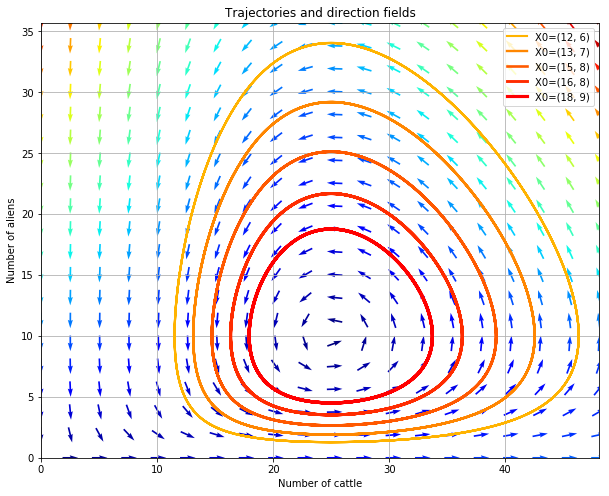

In [168]:
# good example of phase space diagrams
# http://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html


values  = linspace(0.6, 0.9, 5)                          # position of X0 between X_f0 and X_f1
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory

f2 = p.figure()

#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors):
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)         # we don't need infodict here
    p.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = p.ylim(ymin=0)[1]                        # get axis limits
xmax = p.xlim(xmin=0)[1]
nb_points   = 20

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
p.title('Trajectories and direction fields')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Number of cattle')
p.ylabel('Number of aliens')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)
p.show()

# Section 3: A different approach to zombies



Alemi et al.

Large population variation:

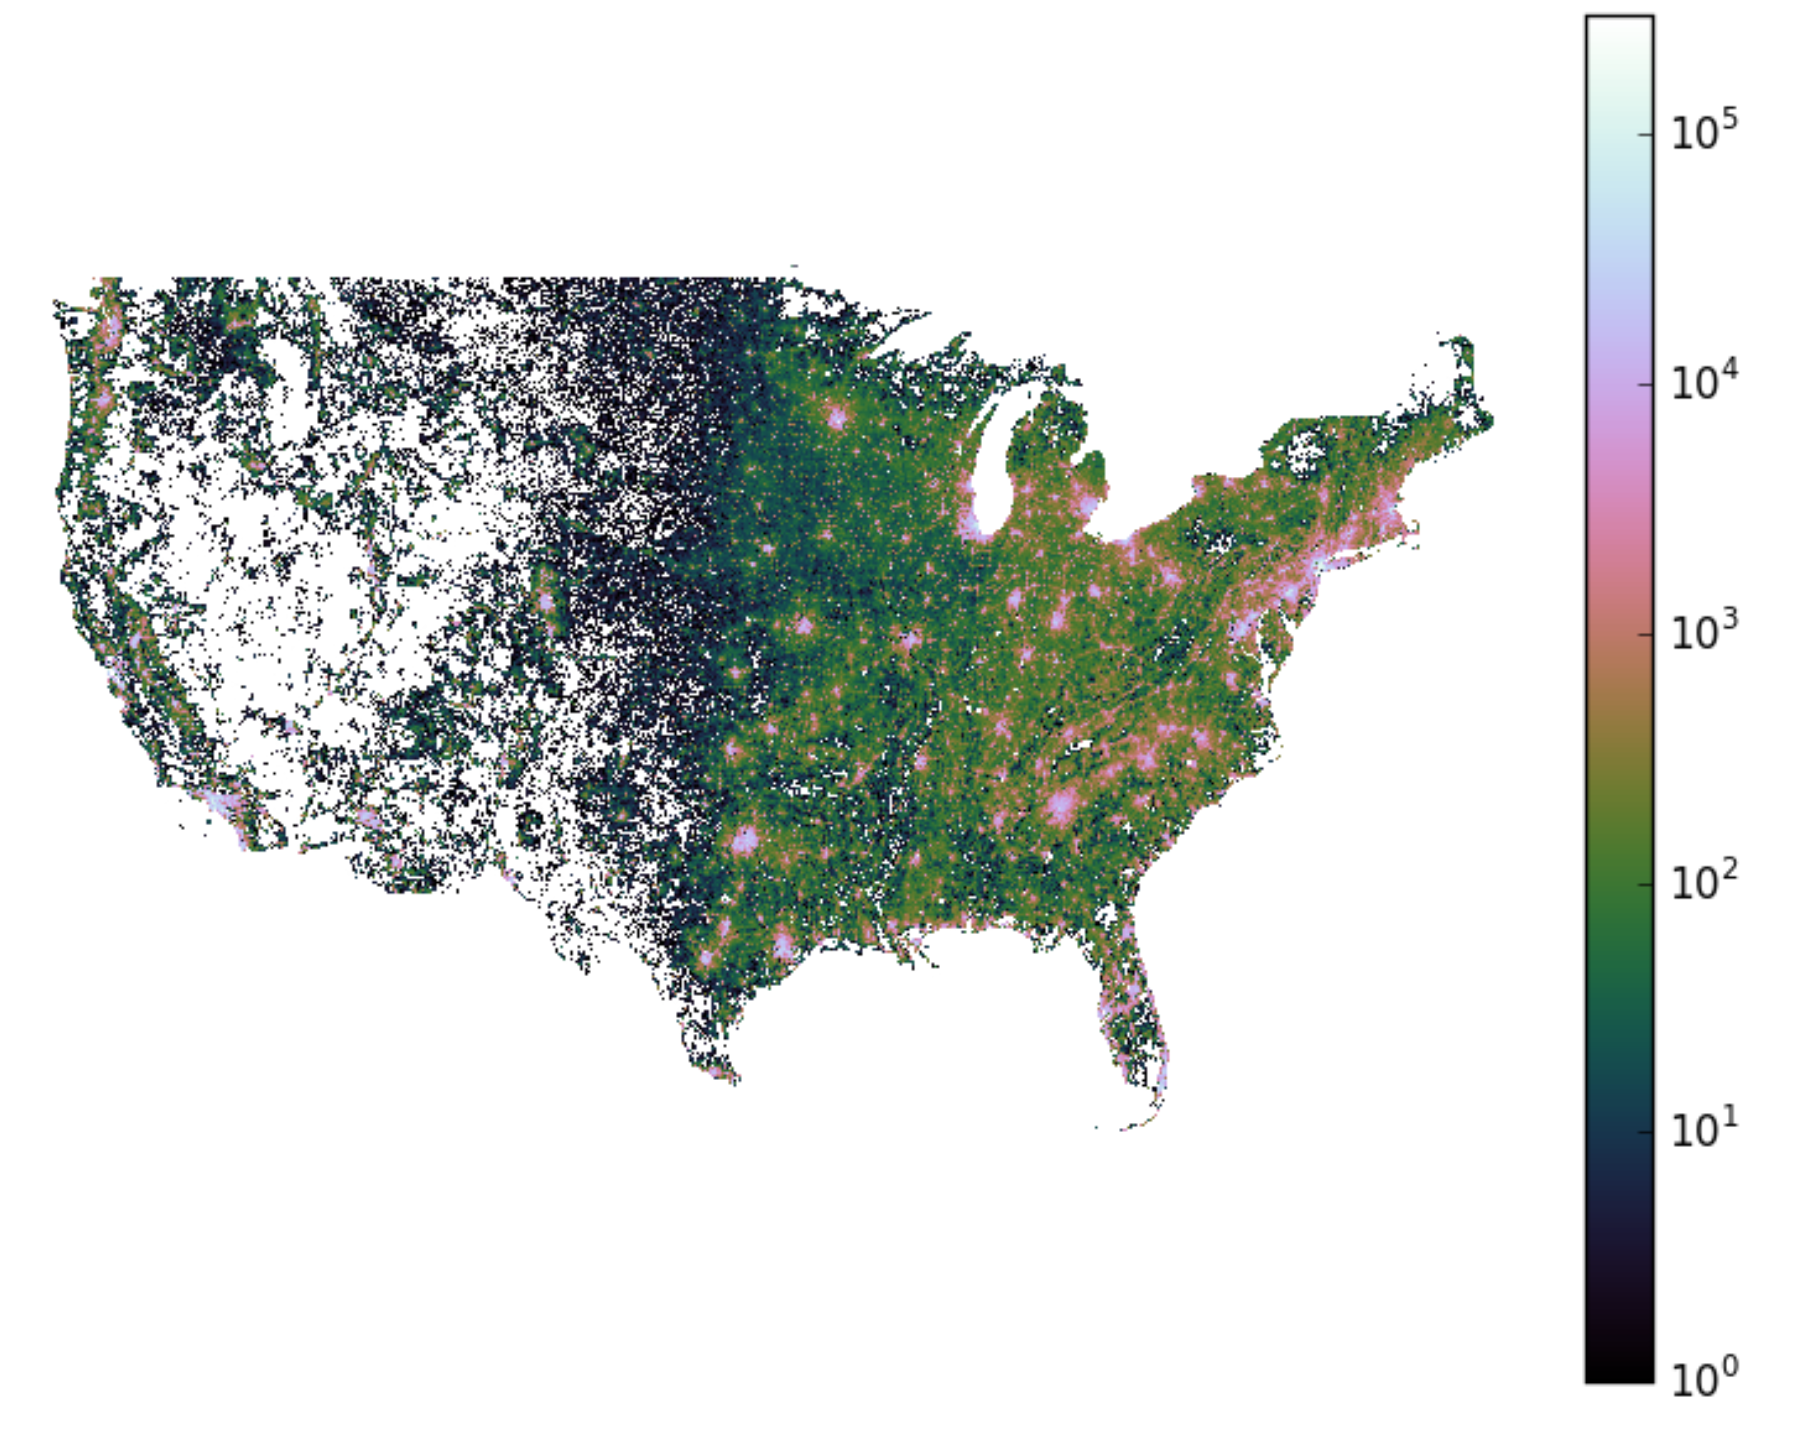

The spread of zombies will depend on the population density. Use a lattice approach:

http://mattbierbaum.github.io/zombies-usa/

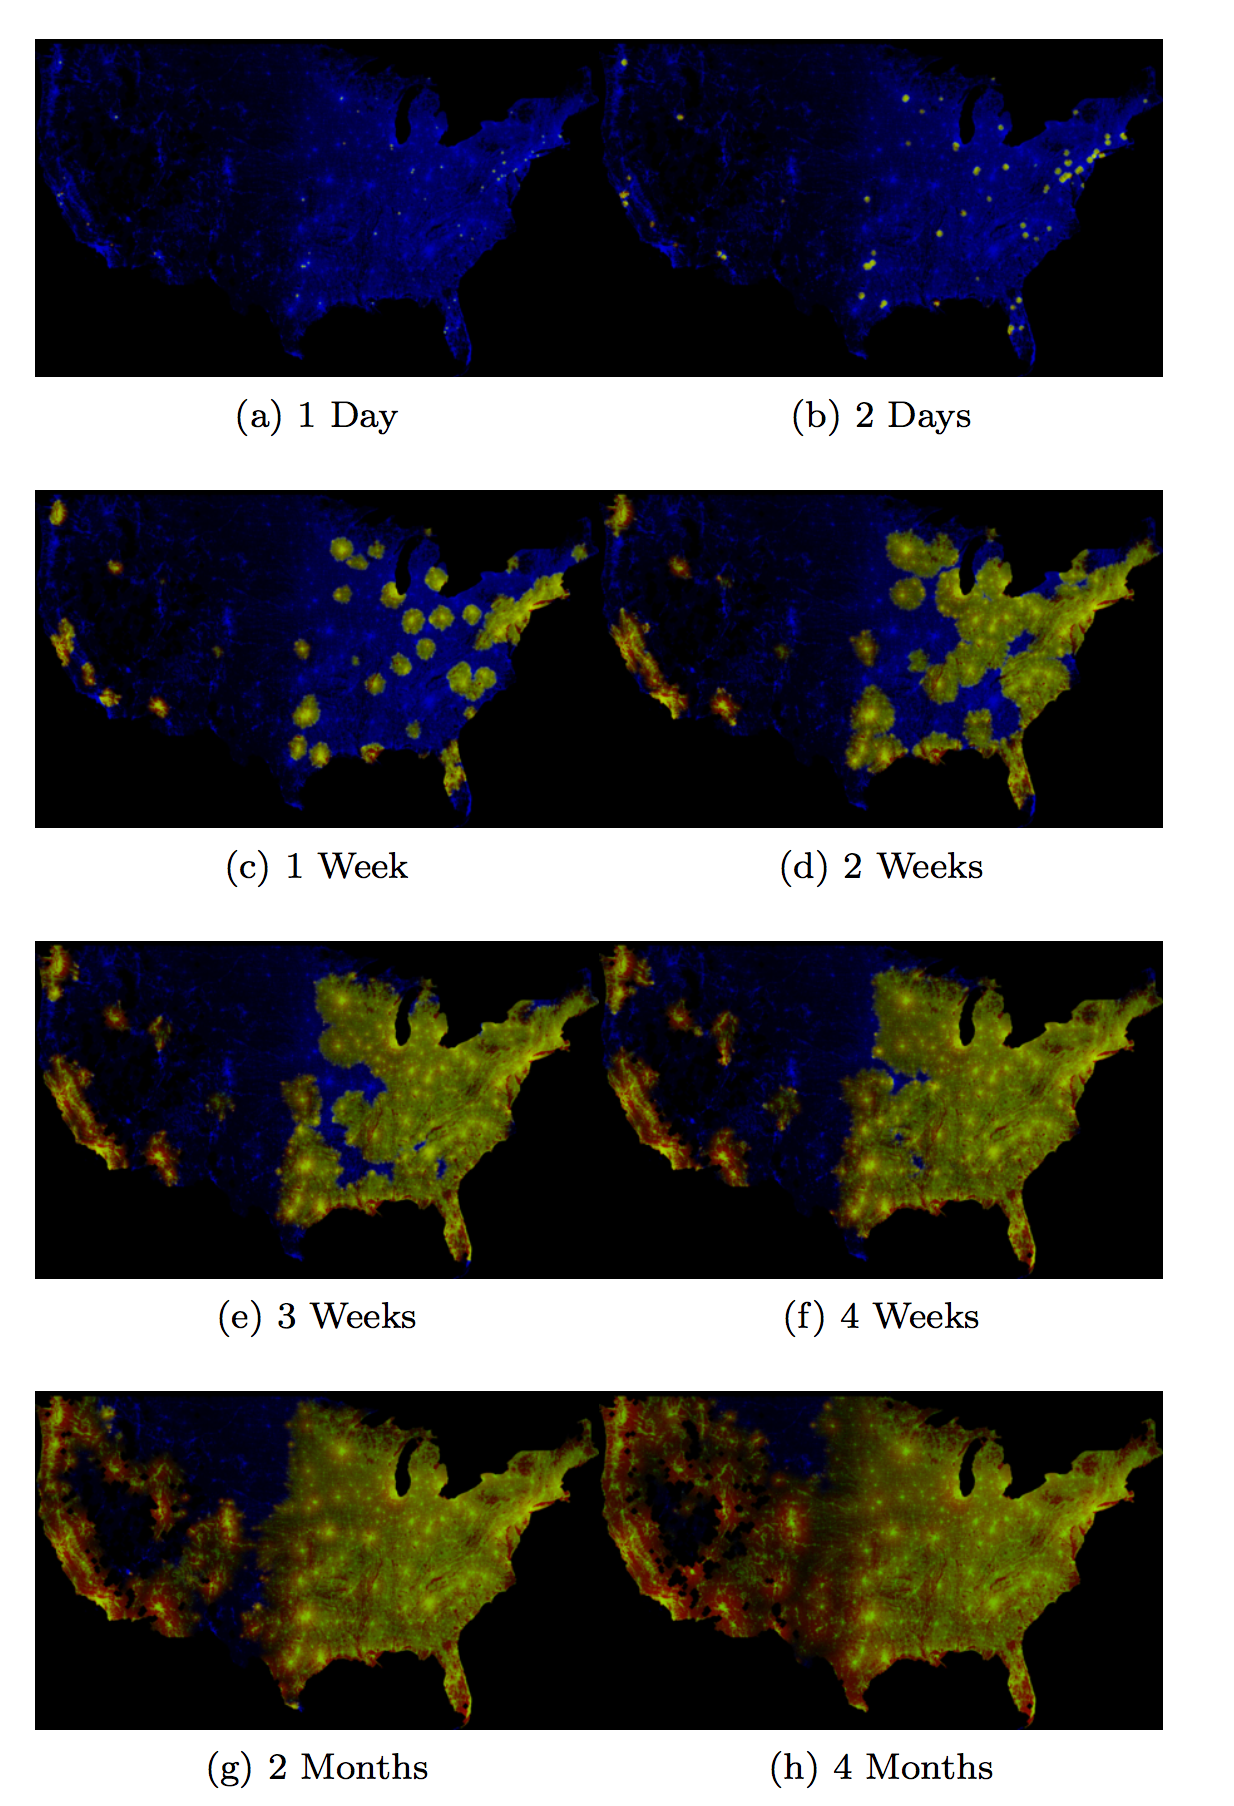


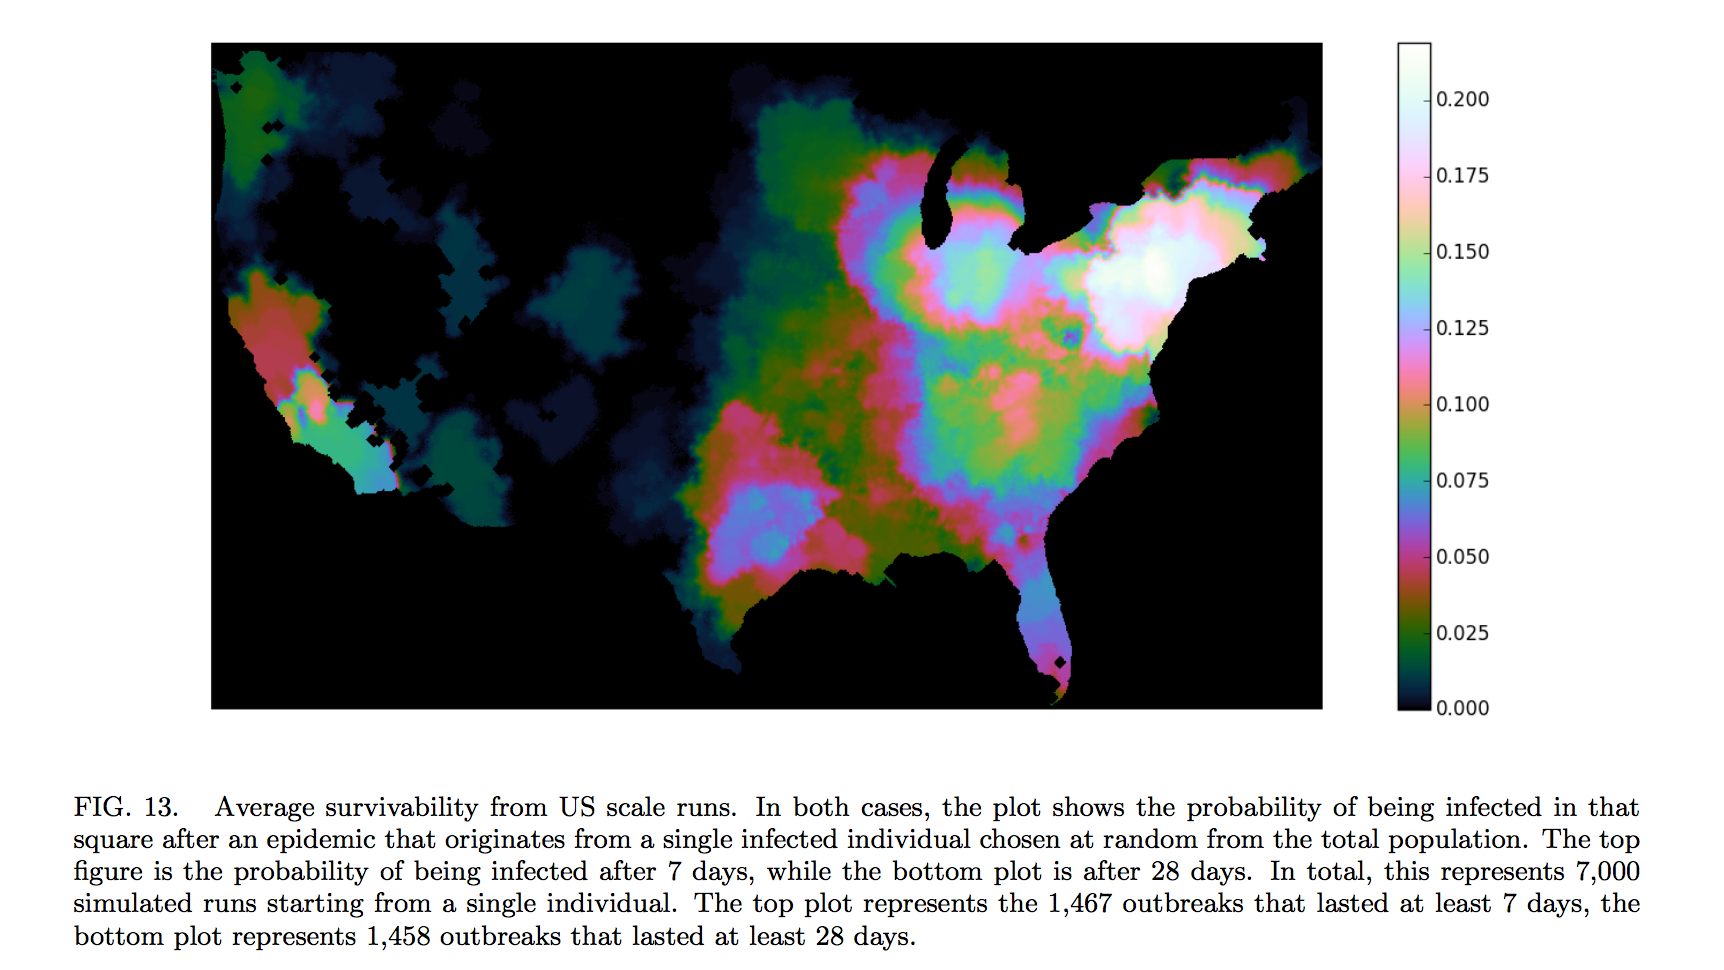

# Section 4 - More modifcations to the zombie model

Langtangen et al.

In a pioneering paper, Munz et. al [3] modeled zombie outbreaks mathe- matically and predicted extinction of mankind if zombies come to existence. Although doomsday was nearly inevitable, it could possibly be prevented by devastating and early counter attacks. This conclusion is supported by most modern zombie movies and stories. In the present paper, we refine this conclusion and use mathematics, computer simulations, and empirical data from movies to question the realism of the doomsday scenario, and also the realism of how zombie movies start.

However, contrary to Munz et al., we argue that dead zombies cannot become functioning zombies again, a fact that
has a fundamental impact on whether the doomsday scenario is likely or not. Second, we propose that the parameters in the model change with time, according to the phases of the human-zombie interaction observed in movies. Third, we put effort into estimating the parameters of the model, based on watching a single movie (The Night of The Living Dead). We fit the model to this movie, so that we can reproduce its scenarios, and thereafter we may use the model to predict how a zombie outbreak will most likely behave in a bigger community with other initial conditions than in the film.

